In [8]:
import os
import cv2
import numpy as np
import sys
from ultralytics import YOLO
import torch
import torchvision.transforms as transforms
import shutil
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import supervision as sv
import matplotlib.pyplot as plt

In [9]:
base_dir = "./data"

train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "Test")

In [3]:
image_size = (640, 640)

In [4]:
# Load the YOLOv8 model
model = YOLO('yolov8n-obb.pt')

# Train the model
model.train(data=os.path.join(base_dir, "data.yaml"), epochs=50, imgsz=640)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 6.26M/6.26M [00:00<00:00, 7.69MB/s]


New https://pypi.org/project/ultralytics/8.3.0 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103  Python-3.10.5 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)
engine\trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=./data\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

train: Scanning C:\Patricia Ho\Braincore\apnr\data\train\labels.cache... 3087 images, 24 backgrounds, 152 corrupt: 100%|██████████| 3087/3087 [00:00<

train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\1-E-3977-QM-09-19_jpg.rf.0e0eb04bbaac97f1ef2845dc4e00e609.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0352]
train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\1-E-3977-QM-09-19_jpg.rf.80521b7fb43c77b1dedd6efda1cc8c33.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1022]
train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\101-E-4604-PS-09-17_jpg.rf.71bb31497a41e7fb69bc37b29a4a630f.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0579]
train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\101-E-4604-PS-09-17_jpg.rf.a054bbff55358984169c3957f1dff11e.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0995]
train: WARNING  C:\Patricia Ho\Braincore\apnr\data\train\images\107-E-4145-QZ-12-20_jpg.rf.a3ecef7db5d3272a41070bc878ac4feb.jpg: ignorin


val: Scanning C:\Patricia Ho\Braincore\apnr\data\valid\labels.cache... 464 images, 1 backgrounds, 45 corrupt: 100%|██████████| 464/464 [00:00<?, ?it/

val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\106-E-4670-TL-05-22_jpg.rf.767f95258abd3a7ad3cf3198171bca5c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0139]
val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\111-E-6810-IX-05-20_jpg.rf.70a1e83f186131251d45f0cf034cb61a.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [       1.02]
val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\115-E-5305-SM-06-20_jpg.rf.7fe05ff1e17b3541ae39a0a98825f2fe.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0033]
val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\123-E-4603-PAE-07-21_jpg.rf.f94576b7d5b69611916bbdaefb8c0676.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0606]
val: WARNING  C:\Patricia Ho\Braincore\apnr\data\valid\images\125-E-4172-QB-11-22_jpg.rf.12edb9bc0287fe6be3ba4392ff2b3c03.jpg: ignoring cor

Plotting labels to runs\obb\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\obb\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.25G      1.333      1.486      2.903         17        640: 100%|██████████| 184/184 [00:44<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.96it/s]


                   all        419        452      0.742      0.867      0.887      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.17G       1.07     0.8375       2.65         16        640: 100%|██████████| 184/184 [00:36<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.11it/s]

                   all        419        452      0.796      0.921      0.884      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.17G      1.026     0.7667      2.544         17        640: 100%|██████████| 184/184 [00:38<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.93it/s]

                   all        419        452       0.87      0.763      0.905      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.17G     0.9844     0.7324      2.534         21        640: 100%|██████████| 184/184 [00:39<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.83it/s]

                   all        419        452      0.749      0.628      0.723      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.17G     0.9516     0.6966      2.484         22        640: 100%|██████████| 184/184 [00:44<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        419        452      0.761      0.591      0.747      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.17G     0.9274     0.6825      2.443         31        640: 100%|██████████| 184/184 [00:47<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.49it/s]

                   all        419        452      0.894      0.952      0.945      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.17G     0.8988     0.6538      2.389         19        640: 100%|██████████| 184/184 [00:57<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]

                   all        419        452      0.887      0.969      0.951      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.17G     0.8712     0.6193      2.391         21        640: 100%|██████████| 184/184 [00:53<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.22it/s]

                   all        419        452      0.903      0.951      0.968      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.17G     0.8713      0.622      2.389         25        640: 100%|██████████| 184/184 [00:52<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.31it/s]

                   all        419        452      0.933      0.951      0.978      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.17G     0.8643      0.614       2.37         15        640: 100%|██████████| 184/184 [01:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

                   all        419        452      0.937       0.81      0.948      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.17G     0.8383     0.5955      2.352         16        640: 100%|██████████| 184/184 [01:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.34it/s]

                   all        419        452      0.926       0.94      0.977      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.17G     0.8336     0.5889      2.339         24        640: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.27it/s]

                   all        419        452      0.905      0.965       0.96      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.17G     0.8291      0.583       2.34         18        640: 100%|██████████| 184/184 [00:50<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.31it/s]

                   all        419        452      0.922      0.971      0.979       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.19G     0.8172     0.5737      2.335         17        640: 100%|██████████| 184/184 [00:54<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.35it/s]

                   all        419        452      0.961      0.978      0.987      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.17G     0.8021     0.5728      2.292         17        640: 100%|██████████| 184/184 [00:51<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.18it/s]

                   all        419        452       0.87       0.92      0.961       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.17G     0.8016     0.5652      2.318         17        640: 100%|██████████| 184/184 [00:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]

                   all        419        452      0.876      0.876      0.955      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.17G     0.7925     0.5519      2.279         14        640: 100%|██████████| 184/184 [00:55<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.16it/s]

                   all        419        452      0.972      0.983      0.987      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.17G     0.7841     0.5438       2.27         18        640: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.09it/s]

                   all        419        452      0.956      0.955      0.988      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.17G     0.7719      0.533      2.255         17        640: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.41it/s]

                   all        419        452      0.955      0.967      0.987      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.17G     0.7871     0.5506      2.264         18        640: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.98it/s]

                   all        419        452       0.93      0.949      0.981      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.17G     0.7677     0.5334      2.272         16        640: 100%|██████████| 184/184 [00:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.27it/s]

                   all        419        452      0.899      0.936       0.97      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G     0.7628     0.5321      2.264         26        640: 100%|██████████| 184/184 [00:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.38it/s]

                   all        419        452      0.929      0.923      0.964      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.17G     0.7607     0.5263       2.26         21        640: 100%|██████████| 184/184 [00:53<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.24it/s]

                   all        419        452      0.976      0.981      0.984      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.17G     0.7391      0.506       2.23         21        640: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.41it/s]

                   all        419        452      0.959      0.987      0.991      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.17G     0.7292     0.4984      2.205         18        640: 100%|██████████| 184/184 [00:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.24it/s]

                   all        419        452      0.976      0.976       0.99       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.17G      0.737     0.4995      2.218         19        640: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.38it/s]

                   all        419        452      0.946      0.982      0.983      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.17G     0.7273     0.5003      2.211         14        640: 100%|██████████| 184/184 [00:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.37it/s]

                   all        419        452      0.978      0.984       0.99      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.17G     0.7259     0.4962      2.211         21        640: 100%|██████████| 184/184 [00:52<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.37it/s]

                   all        419        452      0.922      0.968      0.981      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.19G     0.7168     0.4886      2.202         18        640: 100%|██████████| 184/184 [00:52<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.62it/s]

                   all        419        452      0.985      0.984      0.991      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.17G     0.7066     0.4795      2.184         25        640: 100%|██████████| 184/184 [00:52<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.18it/s]

                   all        419        452       0.98      0.986      0.988       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.17G     0.7085     0.4868       2.18         17        640: 100%|██████████| 184/184 [00:52<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.95it/s]

                   all        419        452      0.976      0.985      0.987      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.17G     0.7099     0.4905      2.213         16        640: 100%|██████████| 184/184 [00:52<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.31it/s]

                   all        419        452      0.982      0.986      0.992      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.17G     0.6984     0.4772      2.192         14        640: 100%|██████████| 184/184 [00:53<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.09it/s]

                   all        419        452      0.976      0.982      0.991      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.17G     0.6903     0.4664       2.17         22        640: 100%|██████████| 184/184 [00:51<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.44it/s]

                   all        419        452      0.981      0.985      0.991      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.17G     0.6826     0.4585      2.165         18        640: 100%|██████████| 184/184 [00:52<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.16it/s]

                   all        419        452      0.956      0.971      0.987      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.17G     0.6807     0.4641      2.178         27        640: 100%|██████████| 184/184 [00:52<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.05it/s]

                   all        419        452      0.959      0.987       0.99      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.17G     0.6828     0.4611      2.156         20        640: 100%|██████████| 184/184 [00:54<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.29it/s]

                   all        419        452      0.974      0.985       0.99      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.19G      0.661     0.4498      2.155         16        640: 100%|██████████| 184/184 [00:53<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]

                   all        419        452      0.982      0.989      0.992      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.17G     0.6592     0.4489      2.151         13        640: 100%|██████████| 184/184 [00:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.34it/s]

                   all        419        452      0.982      0.989      0.991      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.17G     0.6576      0.447      2.164         18        640: 100%|██████████| 184/184 [00:53<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.19it/s]

                   all        419        452       0.98      0.982      0.992      0.836


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.17G     0.6322     0.4372      1.859          5        640: 100%|██████████| 184/184 [00:45<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]

                   all        419        452      0.985      0.985      0.993      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G     0.6242     0.4172      1.845          7        640: 100%|██████████| 184/184 [00:42<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.13it/s]

                   all        419        452      0.975      0.989      0.992      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.17G     0.6198     0.4006      1.831          6        640: 100%|██████████| 184/184 [00:42<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.93it/s]

                   all        419        452      0.986      0.987      0.993      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.17G     0.6122     0.4068      1.822          6        640: 100%|██████████| 184/184 [00:45<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]

                   all        419        452      0.978      0.987      0.987      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.17G     0.5962     0.3978      1.815          4        640: 100%|██████████| 184/184 [00:45<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.86it/s]

                   all        419        452       0.98      0.987      0.993      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.17G     0.5936     0.3912      1.812          8        640: 100%|██████████| 184/184 [00:45<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.88it/s]

                   all        419        452       0.98      0.987      0.993      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.17G     0.5764     0.3821      1.786          9        640: 100%|██████████| 184/184 [00:44<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.56it/s]

                   all        419        452      0.977      0.987      0.991      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.17G     0.5558     0.3706      1.779          7        640: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.27it/s]

                   all        419        452       0.98      0.987      0.993      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.17G     0.5548     0.3642       1.78         10        640: 100%|██████████| 184/184 [00:47<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]

                   all        419        452      0.987      0.987      0.993      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G     0.5482     0.3627       1.75          5        640: 100%|██████████| 184/184 [02:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.18it/s]

                   all        419        452      0.989      0.987      0.993      0.869



50 epochs completed in 0.864 hours.
Optimizer stripped from runs\obb\train\weights\last.pt, 6.5MB
Optimizer stripped from runs\obb\train\weights\best.pt, 6.5MB

Validating runs\obb\train\weights\best.pt...
Ultralytics YOLOv8.2.103  Python-3.10.5 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.73it/s]


                   all        419        452      0.989      0.987      0.993      0.869
Speed: 0.7ms preprocess, 3.8ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs\obb\train


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000221BB02FC70>
curves: []
curves_results: []
fitness: 0.8812091732090249
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.86883])
names: {0: 'plat'}
plot: True
results_dict: {'metrics/precision(B)': 0.9885754562779931, 'metrics/recall(B)': 0.9867256637168141, 'metrics/mAP50(B)': 0.9925999819620579, 'metrics/mAP50-95(B)': 0.8688324166809102, 'fitness': 0.8812091732090249}
save_dir: WindowsPath('runs/obb/train')
speed: {'preprocess': 0.6677034646628296, 'inference': 3.821794059225369, 'loss': 0.0, 'postprocess': 5.23634685252333}

In [10]:
model_best = YOLO('./runs/detect/train9/weights/best.pt')

In [5]:
images_dir = os.path.join(test_dir, "images")
labels_dir = os.path.join(test_dir, "labels")

# Load the OBB YOLOv8 model
model = YOLO('./runs/obb/train/weights/best.pt')  # Path to your trained OBB model

# Initialize lists to store true and predicted labels
y_true = []  # This will hold 1 (plat present) or 0 (no plat)
y_pred = []  # This will hold 1 (detected plat) or 0 (no plat detected)

# Define class for plat
plat_class_id = 0  # Assuming class 0 corresponds to 'plat'

# Process each image in the test set
for img_name in os.listdir(images_dir):
    if img_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter for image files
        img_path = os.path.join(images_dir, img_name)
        
        # Load image
        image = cv2.imread(img_path)

        # Run inference
        results = model(img_path)

        # Extract detections from the model results
        detections = sv.Detections.from_ultralytics(results[0])

        # Check if 'plat' was detected in the image
        detected_plat = any(detection_class == plat_class_id for detection_class in detections.class_id)

        # Load the true labels from the labels directory
        label_path = os.path.join(labels_dir, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))
        
        # Assume 'plat' is present if the label file exists and contains 'plat'
        if os.path.exists(label_path):
            true_labels = np.loadtxt(label_path, dtype=int, usecols=(0))  # Assuming class labels are in the first column
            if true_labels.ndim == 0:  # Single label case
                true_plat_present = (true_labels == plat_class_id)  # Check if it's a 'plat'
            else:
                true_plat_present = any(true_label == plat_class_id for true_label in true_labels)  # Check for 'plat'
        else:
            true_plat_present = False  # No label file means no plat in the image

        # Add true and predicted values
        y_true.append(1 if true_plat_present else 0)
        y_pred.append(1 if detected_plat else 0)

        # Print the detection status
        if detected_plat:
            print(f"Detected 'plat' in {img_name}.")
        else:
            print(f"No 'plat' detected in {img_name}.")


image 1/1 C:\Patricia Ho\Braincore\apnr\data\Test\images\01-image_1509470240_59f8b0204ebdf_jpg.rf.ac25aabee09cb7957daf2d6b83afc4aa.jpg: 640x640 9.0ms
Speed: 3.0ms preprocess, 9.0ms inference, 118.0ms postprocess per image at shape (1, 3, 640, 640)
Detected 'plat' in 01-image_1509470240_59f8b0204ebdf_jpg.rf.ac25aabee09cb7957daf2d6b83afc4aa.jpg.

image 1/1 C:\Patricia Ho\Braincore\apnr\data\Test\images\012-2013-kondisi-sangat-istimewa-plat-b-7dd9b622-c43e-4afd-a6af-d17aa7604035_jpg.rf.f38f7daf165e7800c841a558a28e325d.jpg: 640x640 13.0ms
Speed: 6.0ms preprocess, 13.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Detected 'plat' in 012-2013-kondisi-sangat-istimewa-plat-b-7dd9b622-c43e-4afd-a6af-d17aa7604035_jpg.rf.f38f7daf165e7800c841a558a28e325d.jpg.

image 1/1 C:\Patricia Ho\Braincore\apnr\data\Test\images\019_jpg.rf.8c22a2b550ab504e6f348654afb902a6.jpg: 640x640 19.0ms
Speed: 6.0ms preprocess, 19.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
D

In [10]:
%matplotlib inline

Accuracy: 0.94
Precision: 1.00
Recall: 0.94
F1-Score: 0.97


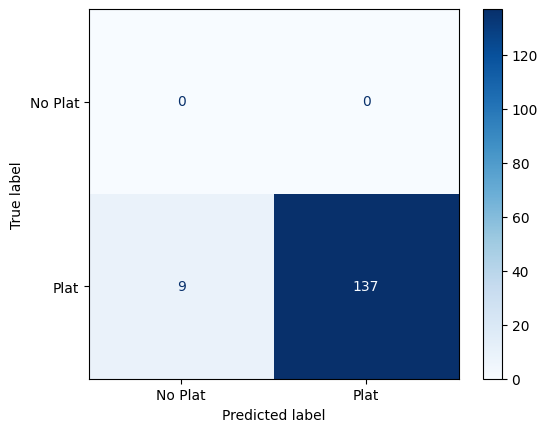

In [11]:
if y_true and y_pred:  # Ensure we have true and predicted values to compare
    # Calculate metrics (Accuracy, Precision, Recall, F1-Score)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Display the results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    # Display the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Plat', 'Plat'])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()